In [16]:
# %load /home/jonathan/.ipython/profile_default/startup/01-setup.py
# start up settings for jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

# use plt.style.available() to check out available styles
plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 15.0
plt.rcParams['axes.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['legend.fontsize'] = 15.0

%matplotlib inline

# set the max column width
pd.options.display.max_colwidth = 1000

# to avoid have warnings from chained assignments
pd.options.mode.chained_assignment = None


In [30]:
idx = pd.IndexSlice

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [4]:
fp = '../../prediction-data/final-data.csv'
uniq_fp = '../../prediction-data/uniq-final-data.csv'

base_df = pd.read_csv(fp, header=[0, 1])
base_df.rename(columns={
    'Unnamed: 0_level_1': '',
    'Unnamed: 1_level_1': '',
    'Unnamed: 2_level_1': '',
    'Unnamed: 3_level_1': ''
}, level=1, inplace=True)

uniq_base_df = pd.read_csv(uniq_fp, header=[0, 1])
uniq_base_df.rename(columns={
    'Unnamed: 0_level_1': '',
    'Unnamed: 1_level_1': '',
    'Unnamed: 2_level_1': '',
    'Unnamed: 3_level_1': ''
}, level=1, inplace=True)

def convert_time_cols(df):
    # convert time columns from us to s
    time_cols = list(filter(lambda c: 'time' in c.lower(), df.columns.get_level_values(level=1)))
    df.loc[:,idx[tuple(time_cols), slice(None)]] /= 1000000

    # rename from us to s
    renamed_time_cols = list(map(lambda col: col.replace('(us)', '(s)'), time_cols))
    renamed_cols_dict = dict(zip(time_cols, renamed_time_cols))
    df.rename(columns=renamed_cols_dict, level=0, inplace=True)
    df.rename(columns=renamed_cols_dict, level=1, inplace=True)
    
convert_time_cols(base_df)
convert_time_cols(uniq_base_df)

base_df.set_index(['model', 'log', 'decomposition', 'SP label'], inplace=True)
uniq_base_df.set_index(['model', 'log', 'decomposition', 'SP label'], inplace=True)

print('Base df shape: {}'.format(base_df.shape))
print('Uniq base df shape: {}'.format(uniq_base_df.shape))

/home/jonathan/github-repos/2018/2018-09-26_align-algo-clf/alignclf-venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,54,56,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Base df shape: (251637, 140)
Uniq base df shape: (191221, 140)


In [5]:
base_df.columns.get_level_values(level=0).unique()

Index(['Cost of the alignment', 'Heuristics computed', 'Heuristics derived',
       'Heuristics estimated', 'Markings added to closed set',
       'Markings polled from queue', 'Markings queued', 'Markings reached',
       'Min', 'Time to compute alignment (s)',
       'Total Time including setup (s)', 'is_valid', 'n_invis_move',
       'n_log_move', 'n_model_move', 'n_sync_move', 'result_dir',
       'model_trace_features'],
      dtype='object')

In [6]:
base_df.columns.get_level_values(level=1).unique()

Index(['astar', 'inc3', 'recomp-astar', 'recomp-inc3', 'Heuristics computed',
       'Heuristics derived', 'Heuristics estimated',
       'Markings added to closed set', 'Markings polled from queue',
       'Markings queued', 'Markings reached', 'Time to compute alignment (s)',
       'Total Time including setup (s)', 'trace_length', 'n_activity',
       'activity_repeat_mean', 'activity_repeat_std', 'snp_n_transition',
       'snp_n_inv_transition', 'snp_n_dup_transition', 'snp_n_uniq_transition',
       'snp_inv_transition_in_degree_mean', 'snp_inv_transition_in_degree_std',
       'snp_inv_transition_out_degree_mean',
       'snp_inv_transition_out_degree_std',
       'snp_uniq_transition_in_degree_mean',
       'snp_uniq_transition_in_degree_std',
       'snp_uniq_transition_out_degree_mean',
       'snp_uniq_transition_out_degree_std',
       'snp_dup_transition_in_degree_mean', 'snp_dup_transition_in_degree_std',
       'snp_dup_transition_out_degree_mean',
       'snp_dup_transi

In [7]:
base_df_description = base_df.describe()
base_df_description

Cost of the alignment                                               \
                      astar           inc3   recomp-astar    recomp-inc3   
count         251637.000000  225682.000000  251637.000000  147794.000000   
mean              60.032070      59.013461      60.093333      54.285370   
std              138.478123     136.281709     138.770761     128.745025   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       0.000000   
50%                0.000000       0.000000       0.000000       0.000000   
75%               48.000000      48.000000      48.000000      40.000000   
max             1256.000000    1256.000000    1256.000000    1224.000000   

      Heuristics computed                                               \
                    astar           inc3   recomp-astar    recomp-inc3   
count        251637.00000  225682.000000  251637.000000  147794.000000   
mean            732.99599       6.762458     786.782496      77.323112   
std            2076.94431      32.764816    2109.876147      44.048480   
min               1.00000       1.000000      12.000000      12.000000   
25%               1.00000       1.000000      71.000000      69.000000   
50%               1.00000       1.000000      74.000000      75.000000   
75%             175.00000       3.000000     208.000000      79.000000   
max           38800.00000    1191.000000   25251.000000     989.000000   

      Heuristics derived                      ...         \
                   astar           inc3       ...          
count      251637.000000  225682.000000       ...          
mean          320.530578     278.036352       ...          
std           660.479741     714.539495       ...          
min             3.000000       3.000000       ...          
25%            59.000000      59.000000       ...          
50%            86.000000      86.000000       ...          
75%           204.000000     190.000000       ...          
max         23185.000000   16646.000000       ...          

              model_trace_features                              \
      subnet_n_inv_transition_mean subnet_n_inv_transition_std   
count                251637.000000               251637.000000   
mean                      2.747568                    5.389237   
std                       1.843236                    2.984518   
min                       1.750000                    3.707093   
25%                       1.934426                    4.599266   
50%                       2.711864                    4.699171   
75%                       2.785714                    5.173487   
max                      19.666667                   33.201406   

                                                                \
      subnet_n_dup_transition_mean subnet_n_dup_transition_std   
count                     251637.0                    251637.0   
mean                           0.0                         0.0   
std                            0.0                         0.0   
min                            0.0                         0.0   
25%                            0.0                         0.0   
50%                            0.0                         0.0   
75%                            0.0                         0.0   
max                            0.0                         0.0   

                                                                  \
      subnet_n_uniq_transition_mean subnet_n_uniq_transition_std   
count                 251637.000000                251637.000000   
mean                       7.617214                    16.992813   
std                        6.391951                     9.152242   
min                        5.191176                    12.473323   
25%                        5.633333                    12.952247   
50%                        5.966667                    15.104316   
75%                        6.053571  

In [8]:
uniq_base_df_description = uniq_base_df.describe()
uniq_base_df_description

Cost of the alignment                                               \
                      astar           inc3   recomp-astar    recomp-inc3   
count         191221.000000  174160.000000  191221.000000  113740.000000   
mean              75.768467      73.524506      75.849086      67.695551   
std              151.979418     148.871943     152.321936     141.090915   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       0.000000   
50%                0.000000       0.000000       0.000000       0.000000   
75%               80.000000      78.000000      80.000000      72.000000   
max             1256.000000    1256.000000    1256.000000    1224.000000   

      Heuristics computed                                               \
                    astar           inc3   recomp-astar    recomp-inc3   
count       191221.000000  174160.000000  191221.000000  113740.000000   
mean           928.213747       8.175413     979.362246      82.649842   
std           2298.266338      36.488934    2336.850292      46.481460   
min              1.000000       1.000000      12.000000      12.000000   
25%              1.000000       1.000000      71.000000      70.000000   
50%              1.000000       1.000000      74.000000      76.000000   
75%            638.000000       4.000000     560.000000      84.000000   
max          38800.000000    1191.000000   25251.000000     989.000000   

      Heuristics derived                      ...         \
                   astar           inc3       ...          
count      191221.000000  174160.000000       ...          
mean          380.013769     324.277245       ...          
std           731.380669     793.882043       ...          
min             3.000000       3.000000       ...          
25%            60.000000      60.000000       ...          
50%            94.000000      93.000000       ...          
75%           295.000000     235.000000       ...          
max         23185.000000   16646.000000       ...          

              model_trace_features                              \
      subnet_n_inv_transition_mean subnet_n_inv_transition_std   
count                191221.000000               191221.000000   
mean                      2.615541                    5.155913   
std                       1.608178                    2.608498   
min                       1.750000                    3.707093   
25%                       1.906250                    4.555543   
50%                       2.711864                    4.699171   
75%                       2.785714                    5.173487   
max                      19.666667                   33.201406   

                                                                \
      subnet_n_dup_transition_mean subnet_n_dup_transition_std   
count                     191221.0                    191221.0   
mean                           0.0                         0.0   
std                            0.0                         0.0   
min                            0.0                         0.0   
25%                            0.0                         0.0   
50%                            0.0                         0.0   
75%                            0.0                         0.0   
max                            0.0                         0.0   

                                                                  \
      subnet_n_uniq_transition_mean subnet_n_uniq_transition_std   
count                 191221.000000                191221.000000   
mean                       7.028670                    16.122858   
std                        5.359258                     7.778381   
min                        5.191176                    12.473323   
25%                        5.633333                    12.952247   
50%                        5.868852                    14.679513   
75%                        6.053571  

### Visualize data classes

In [29]:
cmap_data.colors

((0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392))

In [42]:
cmap_data(5)

(0.8901960784313725, 0.10196078431372549, 0.10980392156862745, 1.0)

In [36]:
percentiles_classesb

array([0.70336238, 0.15651911, 0.08823027, 0.05188824])

In [37]:
percentile_classes_uniq

array([0.64283212, 0.19863927, 0.09379723, 0.06473138])

In [45]:
classes[:5]

array([0, 0, 0, 0, 0])

In [63]:
_.get_fa

True

In [57]:
cmap_data.colors

((0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392))

In [76]:
np.random.random(4)

array([0.95124928, 0.55410405, 0.32823251, 0.66453208])

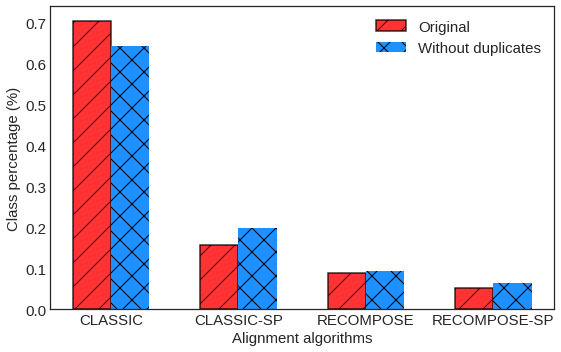

In [174]:
class_counts = base_df.loc[:,('Min', 'Total Time including setup (s)')].value_counts().values
percentile_classes = class_counts / class_counts.sum()

class_counts_uniq = uniq_base_df.loc[:,('Min', 'Total Time including setup (s)')].value_counts().values
percentile_classes_uniq = class_counts_uniq / class_counts_uniq.sum()

def visualize_classes(percentile_classes, percentile_classes_uniq):
    fig, ax = plt.subplots(figsize=(8, 5))

    algo_types = [
        'CLASSIC', 'CLASSIC-SP', 'RECOMPOSE', 'RECOMPOSE-SP'
    ]
    data_type = ['Original', 'Without duplicates']

    hatches = ['/', 'x', '\\', '.']
    colors = ['red', 'dodgerblue', 'green', 'purple']
    width = 0.3
    alpha = 0.8
    xticks = algo_types
    yticks = [i * 0.1 for i in range(11)]
    ind = np.arange(4)
    edgecolor = 'black'
    linewidth = 1.5
    fontsize=15

    rects1 = ax.bar(ind, percentile_classes, width, color=colors[0], 
                    hatch=hatches[0], alpha=alpha, edgecolor=edgecolor, linewidth=linewidth)
    rects2 = ax.bar(ind + width, percentile_classes_uniq, width, color=colors[1], hatch=hatches[1])

    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(xticks)
    ax.set_ylabel('Class percentage (%)', fontsize=fontsize)
    ax.set_xlabel('Alignment algorithms', fontsize=fontsize)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        tick.label.set_horizontalalignment('center')
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)

    ax.legend((rects1[0], rects2[0]), data_type, fontsize=fontsize);
    
    return fig, ax

fig, ax = visualize_classes(percentile_classes, percentile_classes_uniq)
out_fp = './class-dist.svg'
fig.tight_layout()
fig.savefig(out_fp, bbox_inches='tight', rasterized=True)

In [171]:
base_df.groupby(level='model').last().loc[:,idx[('model_trace_features'), ('n_transition', 'n_place', 'n_arc', 'trace_length')]].describe()

model_trace_features                                     
              trace_length n_transition     n_place       n_arc
count            19.000000    19.000000   19.000000   19.000000
mean             73.052632   209.473684  185.947368  470.947368
std              30.700115    43.148797   30.443890   87.813865
min              23.000000   127.000000  136.000000  306.000000
25%              46.000000   178.500000  164.500000  414.000000
50%              76.000000   208.000000  181.000000  500.000000
75%              94.500000   243.000000  211.500000  541.000000
max             127.000000   264.000000  245.000000  580.000000

### Check for statistically and scientifically significant differences

In [316]:
min_total_astar = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'astar'
min_total_inc3 = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'inc3'
min_total_r_astar = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'recomp-astar'
min_total_r_inc3 = base_df.loc[:, ('Min', 'Total Time including setup (s)')] == 'recomp-inc3'

select_col_0 = ('model_trace_features', 'Total Time including setup (s)', 'Cost of alignment')
select_col_1 = ('trace_length', 'astar', 'inc3', 'recomp-astar', 'recomp-inc3')

stats_astar = base_df.loc[min_total_astar, idx[select_col_0, select_col_1]].describe()
stats_inc3 = base_df.loc[min_total_inc3, idx[select_col_0, select_col_1]].describe()
stats_r_astar = base_df.loc[min_total_r_astar, idx[select_col_0, select_col_1]].describe()
stats_r_inc3 = base_df.loc[min_total_r_inc3, idx[select_col_0, select_col_1]].describe()

select_col_0 = ('Total Time including setup (s)', 'Cost of alignment')
select_col_1 = ('astar', 'inc3', 'recomp-astar', 'recomp-inc3')

algo_type = ['astar', 'inc3', 'recomp-astar', 'recomp-inc3']
conditions = [min_total_astar, min_total_inc3, min_total_r_astar, min_total_r_inc3]

diff_df_list = list()

for algo, condition in zip(algo_type, conditions):
    diff = base_df.loc[condition, idx[select_col_0, select_col_1]]
    total_time = diff.loc[:, ('Total Time including setup (s)', algo)].values.reshape((diff.shape[0], 1))
    diff.loc[:, idx[('Total Time including setup (s)'), slice(None)]] -= np.repeat(total_time, 4, axis=1)
    
    diff_df_list.append(diff)


/home/jonathan/github-repos/2018/2018-09-26_align-algo-clf/alignclf-venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


In [317]:
diff_stats_df_list = list(map(lambda df: df.describe(), diff_df_list))
keys = ['CLASSIC', 'CLASSIC-SP', 'RECOMPOSE', 'RECOMPOSE-SP']
class_diff = pd.concat(diff_df_list, keys=keys)
class_stats = pd.concat(diff_stats_df_list, keys=keys).unstack()
to_drop = [
    'count', 'min', '25%', '50%', '75%', 'max', 'std'
]
to_drop_0 = [
    'model_trace_features'
]
class_stats.drop(to_drop, level=2, axis=1)

Total Time including setup (s)                                   
                                      astar      inc3 recomp-astar recomp-inc3
                                       mean      mean         mean        mean
CLASSIC                            0.000000  0.395654     0.086788    0.303459
CLASSIC-SP                         9.784366  0.000000     8.105376    0.884392
RECOMPOSE                          2.265798  3.067583     0.000000    2.149062
RECOMPOSE-SP                      17.305212  2.037507    15.616193    0.000000

In [332]:
class_stats.drop(['count', 'min', '25%', '50%', '75%', 'max'], level=2, axis=1)

Total Time including setup (s)                                  \
                                      astar                 inc3              
                                       mean        std      mean        std   
CLASSIC                            0.000000   0.000000  0.395654   7.050038   
CLASSIC-SP                         9.784366  19.483457  0.000000   0.000000   
RECOMPOSE                          2.265798  14.573762  3.067583  18.932715   
RECOMPOSE-SP                      17.305212  24.978496  2.037507   8.284234   

                                                             
             recomp-astar            recomp-inc3             
                     mean        std        mean        std  
CLASSIC          0.086788   1.142035    0.303459   5.091396  
CLASSIC-SP       8.105376  16.251060    0.884392   6.911928  
RECOMPOSE        0.000000   0.000000    2.149062  15.567385  
RECOMPOSE-SP    15.616193  23.739655    0.000000   0.000000

In [357]:
grouped = class_stats.drop(['min', '25%', '50%', '75%', 'max'], level=2, axis=1).groupby(level=1, axis=1)

def compute_se(df, algo):
    std = df.loc[:, ('Total Time including setup (s)', algo, 'std')]
    count = df.loc[:, ('Total Time including setup (s)', algo, 'count')]
    df.loc[:, ('Total Time including setup (s)', algo, 'se')] = std / ((count - 1) ** 0.5)
    return df
    
df_list = []
for name, group in grouped:
    df_list.append(compute_se(group, name))

pd.concat(df_list, axis=1).to_csv('./class-diff.csv', float_format='%.2f')

In [333]:
list(map(lambda df: df.shape[0], diff_df_list))

[176992, 39386, 22202, 13057]

In [338]:
class_stats.loc[:, idx[slice(None), slice(None), ('std')]] / list(map(lambda df: (df.shape[0] - 1) ** 0.5, diff_df_list))

Total Time including setup (s)                                   
                                      astar      inc3 recomp-astar recomp-inc3
                                        std       std          std         std
CLASSIC                            0.000000  0.035524     0.007665    0.044559
CLASSIC-SP                         0.046312  0.000000     0.109068    0.060491
RECOMPOSE                          0.034641  0.095400     0.000000    0.136242
RECOMPOSE-SP                       0.059373  0.041743     0.159327    0.000000

### Testing classification with 10% of data

In [23]:
from sklearn import tree
import sklearn
from sklearn.model_selection import GridSearchCV
import graphviz

In [29]:
base_df_10 = base_df.sample(frac=0.1, random_state=123)
uniq_base_df_10 = uniq_base_df.sample(frac=0.1, random_state=123)

class_map = {
    'astar': 0,
    'inc3': 1,
    'recomp-astar': 2,
    'recomp-inc3': 3
}

X = base_df_10.loc[:, idx['model_trace_features', slice(None)]]
y = base_df_10.loc[:, ('Min', 'Total Time including setup (s)')].map(class_map)

target_names = [
    'astar', 'inc3', 'recomp-astar', 'recomp-inc3'
]

feature_names = X.columns.get_level_values(level=1)

n_folds = 5

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=7, cv=n_folds)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.74137656970275 {'max_depth': 8}


In [34]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file='./tree.dot', 
                                feature_names=feature_names, 
                               class_names=target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
# graph.render('clf')
# graph

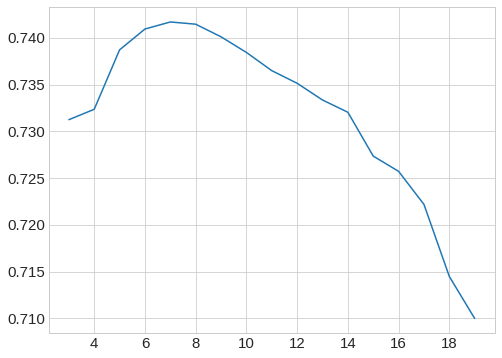

In [21]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.plot(range(3, 20), scores)